# FIXED COUPON BOND EXAMPLE TREASURY

This is a US Treasury bond analysis based on example in https://data.bloomberglp.com/bat/sites/3/2017/07/SF-2017_Paul-Fjeldsted.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils import *
from financepy.products.bonds.FinBond import *

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



# Define the Bond

In [4]:
issueDate = FinDate(15, 5, 2010)
maturityDate = FinDate(15, 5, 2027)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = ONE_MILLION

In [8]:
bond = FinBond(issueDate, maturityDate, coupon, freqType, accrualType, face)

In [9]:
cleanPrice = 99.7808417  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [10]:
print(bond)

OBJECT TYPE: FinBond
ISSUE DATE: SAT 15 MAY 2010
MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 1000000


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [11]:
settlementDate = FinDate(21, 7, 2017)

In [12]:
bond.printFlows(settlementDate)

WED 15 NOV 2017      11875.00 
TUE 15 MAY 2018      11875.00 
THU 15 NOV 2018      11875.00 
WED 15 MAY 2019      11875.00 
FRI 15 NOV 2019      11875.00 
FRI 15 MAY 2020      11875.00 
SUN 15 NOV 2020      11875.00 
SAT 15 MAY 2021      11875.00 
MON 15 NOV 2021      11875.00 
SUN 15 MAY 2022      11875.00 
TUE 15 NOV 2022      11875.00 
MON 15 MAY 2023      11875.00 
WED 15 NOV 2023      11875.00 
WED 15 MAY 2024      11875.00 
FRI 15 NOV 2024      11875.00 
THU 15 MAY 2025      11875.00 
SAT 15 NOV 2025      11875.00 
FRI 15 MAY 2026      11875.00 
SUN 15 NOV 2026      11875.00 
SAT 15 MAY 2027    1011875.00 


The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

In [13]:
print("Current Yield %12.7f %%" % (bond.currentYield(cleanPrice)*100))

Current Yield    2.3802164 %


Yield to maturity using UK convention

In [10]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYTMCalcType.UK_DMO)

0.02400000003008349

Yield to maturity using US Street convention

In [11]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYTMCalcType.US_STREET)

0.02400000003008349

Yield to maturity using US Treasury convention

In [12]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYTMCalcType.US_TREASURY)

0.02399810289387507

## Vectorizations

Some bond function such as yield to maturity support vectorisation

In [13]:
cleanPrices = np.linspace(70,150,20)

In [14]:
ylds = bond.yieldToMaturity(settlementDate, cleanPrices, FinYTMCalcType.US_TREASURY)

Text(0, 0.5, 'Clean Prices')

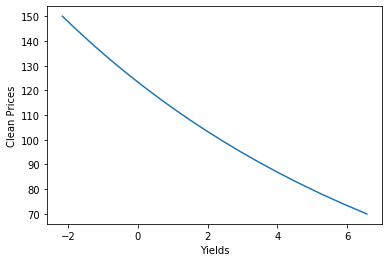

In [15]:
plt.plot(ylds*100.0, cleanPrices)
plt.xlabel("Yields")
plt.ylabel("Clean Prices")

In [16]:
cleanPrices = bond.cleanPriceFromYTM(settlementDate, ylds, FinYTMCalcType.US_TREASURY)

And so we recover the initial input clean prices.

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [17]:
yieldConvention = FinYTMCalcType.US_TREASURY

In [18]:
ytm = bond.yieldToMaturity(settlementDate, cleanPrice, yieldConvention)

Full price is the clean price plus accrued interest

In [19]:
print("Full Price = %12.7f" % bond.fullPriceFromYTM(settlementDate, ytm, yieldConvention))

Full Price =  100.2132466


In [20]:
print("Clean Price = %12.7f" % bond.cleanPriceFromYTM(settlementDate, ytm, yieldConvention))

Clean Price =   99.7808417


Accrued interest is accrued from previous coupon date to settlement date

In [21]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  MON 15 MAY 2017


In [22]:
print("Settlement date is ", settlementDate)

Settlement date is  FRI 21 JUL 2017


The amount of accrued interest is 

In [23]:
print("Accrued = %12.2f" % bond._accruedInterest)

Accrued =      4324.05


This is based on the following number of days of accrual

In [24]:
print("Accrued Days = %d" % bond._accruedDays)

Accrued Days = 67


In [25]:
print("Principal = %12.2f" % bond.principal(settlementDate, ytm, yieldConvention))

Principal =    997808.42


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [26]:
duration = bond.dollarDuration(settlementDate, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  869.215604944813


Modified Duration divides the dollar duration by the full price of the bond

In [27]:
modifiedDuration = bond.modifiedDuration(settlementDate, ytm, yieldConvention)
print("Modified Duration = ", modifiedDuration)

Modified Duration =  8.6736597656556


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [28]:
macauleyDuration = bond.macauleyDuration(settlementDate, ytm, yieldConvention)
print("Macauley Duration = ", macauleyDuration)

Macauley Duration =  8.777735455416934


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [29]:
conv = bond.convexityFromYTM(settlementDate, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.8513814727222182


Copyright (c) 2020 Dominic O'Kane